In [22]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
import json
from IPython.display import display

import pandas as pd

from polarization import get_polarization, get_polarization_by_time
from utils import load_event
from constants import OUTPUT_DIR, EVENTS, FIGURES_DIR

In [24]:
event_polarization = {}

for e in EVENTS:
    data = load_event(e)
    # display(data)
    event_polarization[e] = get_polarization(e, data)

with open(f"{OUTPUT_DIR}/polarization_leaveout.json", 'w') as f:
    json.dump(event_polarization, f)

In [25]:
for e in EVENTS:
    pol_by_day = get_polarization_by_time(e, data, freq="week")
    pol_by_day.to_csv(f"{OUTPUT_DIR}/{e}_polarization_by_day.csv")

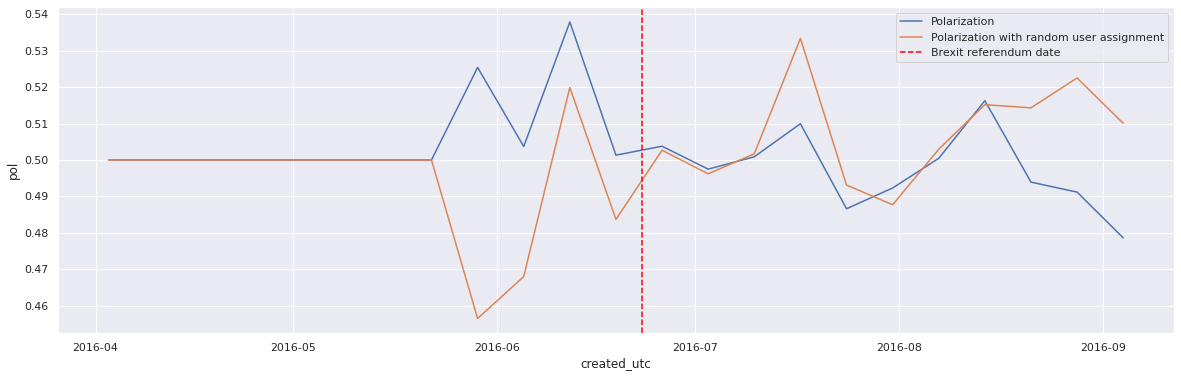

In [27]:
# Plot

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set(rc={"figure.figsize": (20, 6)})

ax = sns.lineplot(x=pol_by_day.created_utc, y=pol_by_day.pol, label="Polarization")
sns.lineplot(data=pol_by_day, x="created_utc", y="random_pol", label="Polarization with random user assignment")

# Brexit referendum date: June 23, 2016
BREXIT_DATE = pd.to_datetime("06-23-2016")

plt.axvline(BREXIT_DATE, linestyle="--", color="red", label="Brexit referendum date")
plt.legend()
plt.savefig(
    fname=f"{FIGURES_DIR}/brexit_pol_by_day.pdf",
    bbox_inches='tight', pad_inches=0, format="pdf"
)
plt.show()